<p style="font-size:36px;text-align:center"> <b>Backorder Prediction</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/ Currently the page is not available </p>

<p> Data_Source: https://github.com/rodrigosantis1/backorder_prediction/blob/master/dataset.rar </p>

<h6> Problem statement : </h6>
<p> Classify the products whether they would go into Backorder based on the historical data from inventory, supply chain and sales </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning

2. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00345-2
3. https://www.researchgate.net/publication/327752791_Demand_Forecasting_Using_Artificial_Neural_Networks-A_Case_Study_of_American_Retail_Corporation
4. https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
5. https://heartbeat.fritz.ai/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Periodic re-training is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://github.com/rodrigosantis1/backorder_prediction/blob/master/dataset.rar
- We have two data files: one conatins containing training data and other containing test data

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are two different classes i.e whether a product went to Backorder "Yes" or "No" => Binary class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>


Metric(s): 
* ROC AUC score : AUC score signifies a model's abiility to differentiate between positive and negative classes. If for a model 1 AUC > model 2 AUC then at most of the threhold values model 1 is able to identify the positive class better than negative class. So it makes a good metric for the problem.
* Area under Precision - recall curve : AUC of Pr-Re curve is very important as the business needs to select threshold based on treade off b/w precision and recall 
* Macro F1-Score : Macro F1 score is average of F1 scores of both positive and negative classes. As class imbalance is present to evaluate the model F1 scores of both classes needs to be consideered.

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict whether a product would go to Backorder or not
</p>
<p> Constraints:
</p>
* Interpretability * No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 80%,10%, 10% of data respectively

<h1>3. Exploratory Data Analysis</h1>

<h2>3.1 Importing the required libraries <h>

In [984]:
!pip install xgboost

In [985]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab 
import scipy.stats as stats
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#import gdown
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from joblib import dump, load

<h2> 3.2 Loading dataset <h2>

In [986]:
data = pd.read_csv('back_order.csv') 
df = data.copy()

<h3> 3.2.1 Checking the data stats <h3>

In [987]:
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
#print("Number of categorical featues including Product id and target variable : " , data.select_dtypes(exclude=['int', 'float']).shape[1])
print('Features : ', data.columns.values)

Number of data points :  9688
Number of features :  23
Features :  ['sku' 'national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [988]:
data.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3352105,0,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.00,0,No,No,No,Yes,No,Yes
1,3403239,6,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.00,0,No,No,No,Yes,No,Yes
2,3286560,0,2.0,0,4,7,7,0,0,0,...,0,0.7,0.73,0,No,No,No,Yes,No,Yes


In [989]:
data.tail(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
9685,3446698,130,8.0,45,70,160,240,53,122,208,...,10,0.84,0.86,1,No,No,No,Yes,No,No
9686,3443031,-7,8.0,0,45,68,95,13,35,74,...,3,0.50,0.46,7,No,No,No,Yes,No,No
9687,3485013,0,2.0,0,40,61,65,0,0,0,...,40,0.86,0.91,10,Yes,No,Yes,Yes,No,No




*   There are in total 1687861 datapoints and 23 features in the dataset
*   Out of the 23 features 22 are indpendent features and 1 is dependent feature ( Target variable)
*   The target variable column name is "went_on_backorder"
*   The last row of the dataset consists of NaN values for all features



<h3> 3.2.2 Info of dataset of data types and non-null values <h3>

In [990]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                9688 non-null   int64  
 1   national_inv       9688 non-null   int64  
 2   lead_time          8473 non-null   float64
 3   in_transit_qty     9688 non-null   int64  
 4   forecast_3_month   9688 non-null   int64  
 5   forecast_6_month   9688 non-null   int64  
 6   forecast_9_month   9688 non-null   int64  
 7   sales_1_month      9688 non-null   int64  
 8   sales_3_month      9688 non-null   int64  
 9   sales_6_month      9688 non-null   int64  
 10  sales_9_month      9688 non-null   int64  
 11  min_bank           9688 non-null   int64  
 12  potential_issue    9688 non-null   object 
 13  pieces_past_due    9688 non-null   int64  
 14  perf_6_month_avg   9688 non-null   float64
 15  perf_12_month_avg  9688 non-null   float64
 16  local_bo_qty       9688 



*   Dataset has 15 columns of data type float and 8 coumns are string ( including target variable)
*   Only the column lead_time has a few null values.
*   It seems the firt column sku consists of productids , if all of them are unique then this column can be dropped.






<h3> 3.2.3 Checking different statastics of the numerical columns using pandas describe fnction <h3>

In [991]:
data.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,9.688000e+03,9688.000000,8473.000000,9688.000000,9.688000e+03,9.688000e+03,9.688000e+03,9688.000000,9.688000e+03,9.688000e+03,9.688000e+03,9688.000000,9688.000000,9688.000000,9688.000000,9688.000000
mean,3.404617e+06,353.050268,7.081199,52.626755,4.749449e+02,8.732313e+02,1.256470e+03,108.548617,3.651058e+02,7.189394e+02,1.080653e+03,94.024360,37.424030,-14.037845,-13.718961,1.677230
std,6.930942e+04,4778.743675,5.755444,615.876767,1.108316e+04,2.247367e+04,3.362884e+04,3140.316576,1.132033e+04,2.203908e+04,3.361208e+04,1954.257008,886.372272,35.430540,35.111369,35.268733
min,3.284951e+06,-2567.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,3.344886e+06,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.370000,0.410000,0.000000
50%,3.403785e+06,9.000000,8.000000,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.000000,3.000000e+00,7.000000e+00,1.000000e+01,0.000000,0.000000,0.730000,0.780000,0.000000
75%,3.464248e+06,60.000000,8.000000,0.000000,4.000000e+01,7.500000e+01,1.080000e+02,10.000000,3.400000e+01,6.800000e+01,9.900000e+01,12.000000,0.000000,0.930000,0.910000,0.000000
max,3.526994e+06,389335.000000,52.000000,36334.000000,1.021940e+06,2.094452e+06,3.162260e+06,299190.000000,1.086554e+06,2.103389e+06,3.195211e+06,168852.000000,79964.000000,1.000000,1.000000,2837.000000


*   The scale of all the features is not same and should be scaled for better performance of ML models.
*   For  all numerical columns the mean value(except for lead_time) is between 50th and 75th percentile or mostly it is above 75th percentile (except for performance columns) which depict that data is extremely skewed right side.
*   The lead_time feature is left skewed.
*   The difference between 75th percentile and max values is very high which depcits that data contains many outliers.
*   The columns perf_6_month_avg and perf_12_month_avg has max. value as 1 and min. value as -99. It seems the missing values are replaced with -99 ( as explained in a few blogs on this dataset)


<h3> 3.2.4 Checking the number of unique rows in sku column <h3>

In [992]:
data.sku.unique()

array([3352105, 3403239, 3286560, ..., 3446698, 3443031, 3485013],
      dtype=int64)



*   As expected the number of unique values in sku column is equal to the number of rows.
*   So this column can be dropped or used as index



Dropping unwanted rows and columns

In [993]:
# Dropping last row as it contains NaN values
data.drop(data.tail(1).index,inplace=True) 


#Dropping first column
data.drop(['sku'], axis = 1,inplace=True) 

<h3> 3.2.5 Checking the class ratio of target variable <h3>

In [994]:
data.went_on_backorder.value_counts()

No     6999
Yes    2688
Name: went_on_backorder, dtype: int64



*   The target variable went_on_backorder is a categorical feature with two values "Yes" and "No".
*   99.33% belong to the class "Yes" and remaining 0.669% belong to the class "No" .
*   Hence the dataset is highly imbalanced with majority and minority class ratio of approximately 148:1



<h3>3.2.6 Plotting Box plots <h3>

Box plot of national_inv

Text(0.5, 1.0, 'Box plot of national_inv')

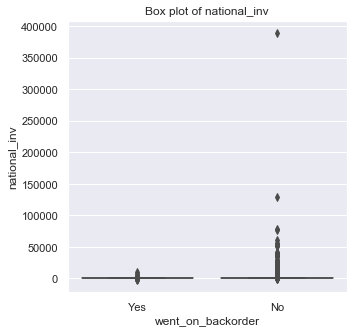

In [995]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='went_on_backorder',y='national_inv', data=data).set_title('Box plot of national_inv')

Text(0.5, 1.0, 'Box plot of national_inv from 0.1th to 90th percentile')

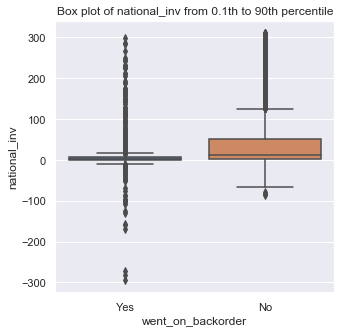

In [996]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=data[(data.national_inv < data.national_inv.quantile(0.90))  & (data.national_inv > data.national_inv.quantile(0.001)) ]).set_title('Box plot of national_inv from 0.1th to 90th percentile')

*   The spread is very high for inventory stock feature and IQR range is very small
*   Fortunately the majority class has outliers and there aren't any outliers in minority class
*   The IQR ranges for both the classes overlap so using this feature individualy won't be very useful for class separation
*   When plotted boxplot considering only the values between 0.1th and 90th percentile values of national_inv it can be seen that majority of the outliers on positive side are removed and max. value dropped from 10^7 to range of 350 
*   Also IQRs of both classes are not overlapping as they were before

Box plot of Lead time feature

Text(0.5, 1.0, 'Box plot of lead_time')

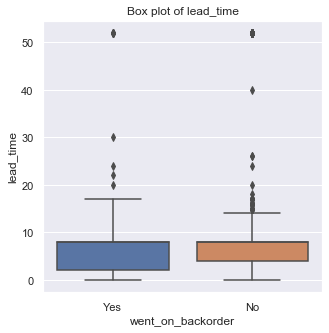

In [997]:
sns.boxplot(x='went_on_backorder',y='lead_time', data=data).set_title('Box plot of lead_time')

*   There are a few outliers in the lead_time feature.
*   IQR of both the classes overlap to some extent , so this feature can be useful in separation of both classes at least in those cases where lead_time is less than 25th percentile value of negative class
*   Median is nearer to 75th percentile value

Box plot of in_transit_qty

Text(0.5, 1.0, 'Box plot of in_transit_qty')

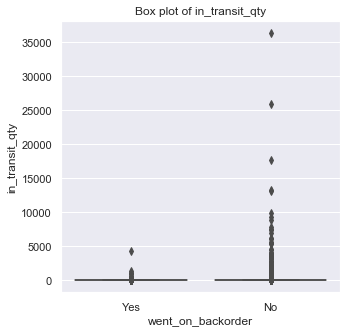

In [998]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0 to 90th percentile')

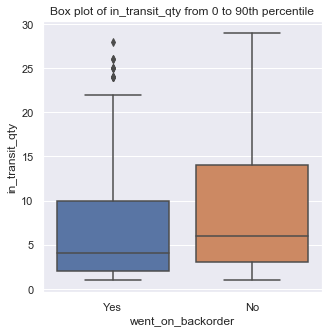

In [999]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data[(data.in_transit_qty < data.in_transit_qty.quantile(0.90))  & (data.in_transit_qty > data.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')

In [1000]:
data[['in_transit_qty']].describe()

,in_transit_qty
count,9687.000000
mean,52.632187
std,615.908327
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,36334.000000




*   Similar to inventory stock feature the IQR is very small and there are many outliers(noise) in the orders that didn't go on backorder
*   The IQR of both the classes for this feature are overlapping .
*   After removal of values which are greater than 90th quantile value and whch are les than 0th quantile it can be seen that in_transit_qty values dropped from 5*10^5 to 16
*   The IQR of both the classes for this feature are overlapping only to some extent now after removal of outliers and for many items whose transit quantity is less than 2 went to backorder and whose quantity is greater than 6 didn't go to backorder


Box plot of the 3 forecast columns

Text(0.5, 0.98, 'Box plot of forecast features')

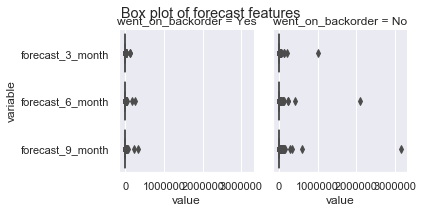

In [1001]:
#https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
g = sns.FacetGrid(pd.melt(data[['forecast_3_month','forecast_6_month','forecast_9_month','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of forecast features')

Text(0.5, 1.0, 'Box plot of forecast_3_month from 0 to 90th percentile')

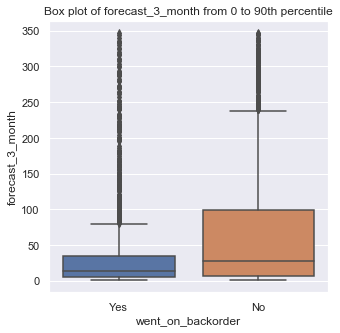

In [1002]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=data[(data.forecast_3_month < data.forecast_3_month.quantile(0.90))  & (data.forecast_3_month > data.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_6_month from 0 to 90th percentile')

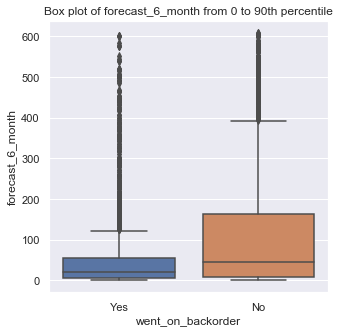

In [1003]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=data[(data.forecast_6_month < data.forecast_6_month.quantile(0.90))  & (data.forecast_6_month > data.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 90th percentile')

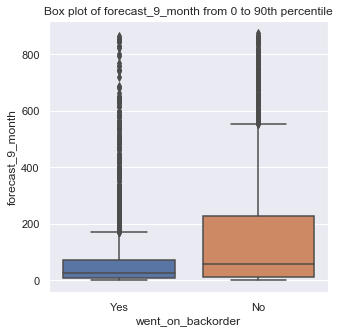

In [1004]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=data[(data.forecast_9_month < data.forecast_9_month.quantile(0.90))  & (data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 80th percentile')

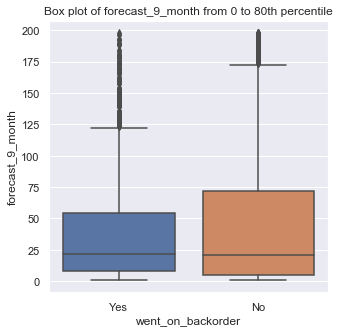

In [1005]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=data[(data.forecast_9_month < data.forecast_9_month.quantile(0.80))  & (data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 80th percentile')



*   The distribution of all the 3 forecast features is similar.
*   Outliers do exist in these 3 features and their amount increase with forecast period
*   Even after the removal of the values which are above 90th quantile value and less than 0th quantile IQRs overlap
*   As values existed after whiskers in the plot of 0-90th percentile values boxplot if we consider only 0-80th perentile then it can be noted that if forecast is higher then there is higher chance of going to backorder



Box plot of the 3 sales columns

Text(0.5, 0.98, 'Box plot of sales features')

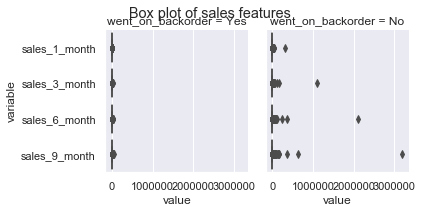

In [1006]:

g = sns.FacetGrid(pd.melt(data[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of sales features')


Text(0.5, 1.0, 'Box plot of sales_1_month from 0 to 90th percentile')

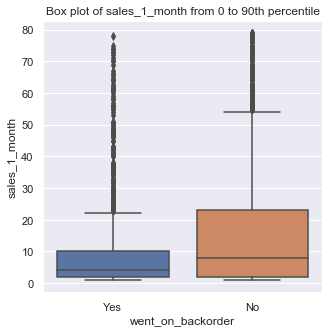

In [1007]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=data[(data.sales_1_month < data.sales_1_month.quantile(0.9))  & (data.sales_1_month > data.sales_1_month.quantile(0))]).set_title('Box plot of sales_1_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0 to 90th percentile')

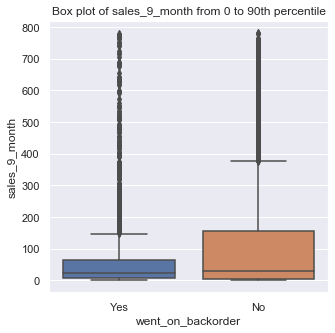

In [1008]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=data[(data.sales_9_month < data.sales_9_month.quantile(0.9))  & (data.sales_9_month > data.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0 to 80th percentile')

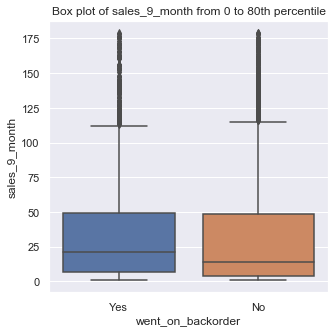

In [1009]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=data[(data.sales_9_month < data.sales_9_month.quantile(0.8))  & (data.sales_9_month > data.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 80th percentile')

*   Box plot of sales features is similar to forecast features
*   The values of these columns are right skewed
*   Even after removal of values greater than 90th quantile value the IQRs overlap fully with many values after whisker representing the max value.
*   So similar to forecast feature if we consider only values till 80th quantile it implies that higher the sales higher are the chances of going to backorder(while making this assumption class imbalace can't be ignored)


Box plot of min_bank

Text(0.5, 1.0, 'Box plot of min_bank')

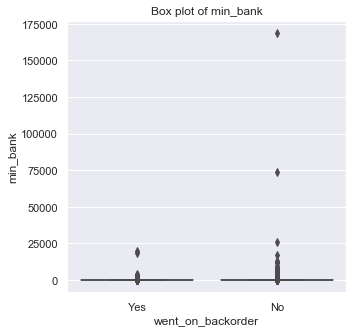

In [1010]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data).set_title('Box plot of min_bank')

Text(0.5, 1.0, 'Box plot of min_bank from 0 to 90th percentile')

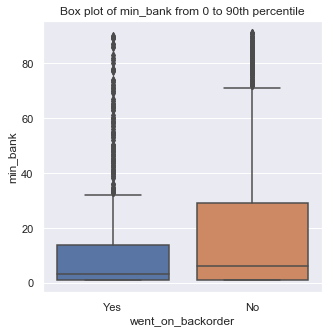

In [1011]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data[(data.min_bank < data.min_bank.quantile(0.9))  & (data.min_bank > data.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of min_bank from 0 to 80th percentile')

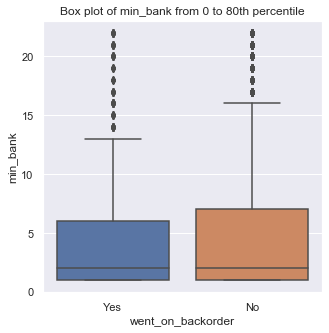

In [1012]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data[(data.min_bank < data.min_bank.quantile(0.8))  & (data.min_bank > data.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 80th percentile')



*   min_bank feature also has right skewedness that is data is present wit high spread after 75th percentile value.
*   The positive class ( went_on_backorder = "Yes" ) doesn't show any skewness after 75th percentile because as this feature represents minimum amount of stock recommended if it is high there is a high chance that this product didn't go on backorder 
*   If we consider only values lesser than 80th quanitle value then if min_bank > 2 then there is very high chance of item going into backorder



Box plot  of pieces_past_due

Text(0.5, 1.0, 'Box plot of pieces_past_due')

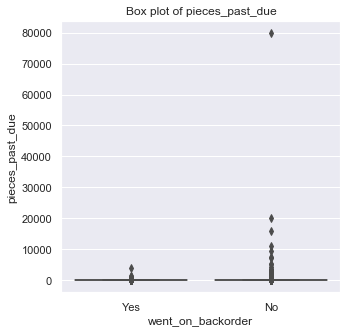

In [1013]:
sns.boxplot(x='went_on_backorder',y='pieces_past_due', data=data).set_title('Box plot of pieces_past_due')

In [1014]:
data[['pieces_past_due']].describe()

,pieces_past_due
count,9687.000000
mean,37.423764
std,886.418026
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,79964.000000


In [1015]:
data.pieces_past_due.quantile(0.98)

244.28000000000065

In [1016]:
data.pieces_past_due.quantile(0.99)

504.0

In [1017]:
data[((data['pieces_past_due']==0) & (data['went_on_backorder'] == 'No'))].describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,4940.000000,3811.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.000000,4940.0,4940.000000,4940.000000,4940.000000
mean,343.248785,7.905012,18.445749,113.130567,201.400810,282.770040,24.588057,79.021457,161.323482,239.500202,25.982996,0.0,-25.260176,-24.918377,0.109717
std,2615.023137,7.313627,176.058654,1569.055263,2565.624403,3483.186796,273.454695,810.901958,1717.253685,2495.414493,228.963910,0.0,43.819924,43.630282,3.961000
min,-78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-99.000000,-99.000000,0.000000
25%,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-99.000000,-99.000000,0.000000
50%,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.730000,0.750000,0.000000
75%,65.250000,9.000000,0.000000,0.000000,1.000000,3.000000,1.000000,5.000000,11.000000,17.000000,2.000000,0.0,0.940000,0.920000,0.000000
max,77113.000000,52.000000,7345.000000,59136.000000,102912.000000,141824.000000,12955.000000,41473.000000,92752.000000,132068.000000,9672.000000,0.0,1.000000,1.000000,250.000000




*   IQR ranges of both the classes are over lapping for pieces_past_due feature.
*   The spread is very high for negative class after 75th percentile
*   Only 1% of values has non-zero spieces_past_due 




Box plot of performance features

Text(0.5, 0.98, 'Box plot of performance features')

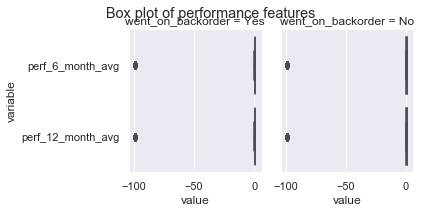

In [1018]:

g = sns.FacetGrid(pd.melt(data[['perf_6_month_avg','perf_12_month_avg','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of performance features')


Text(0.5, 1.0, 'Box plot of perf_6_month_avg from 0 to 90th percentile')

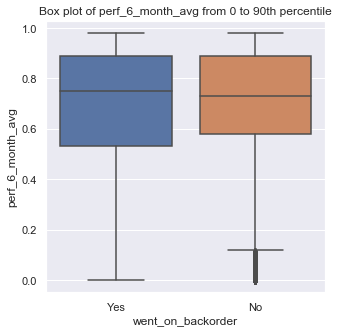

In [1019]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=data[(data.perf_6_month_avg < data.perf_6_month_avg.quantile(0.9))  & (data.perf_6_month_avg > data.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of perf_12_month_avg from 0 to 90th percentile')

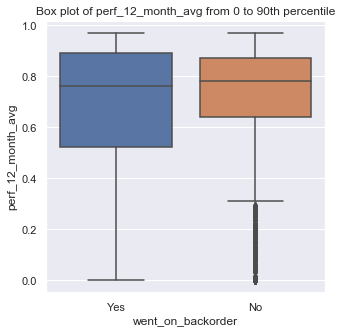

In [1020]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=data[(data.perf_12_month_avg < data.perf_12_month_avg.quantile(0.9))  & (data.perf_12_month_avg > data.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg from 0 to 90th percentile')



*   The assumption we assumed that -99 represents a mising value for performance column seems to be true as there are n't any sgnificant negative values in the plot
*   When replotted boxplot for values between 0th and 90th quantiles it can be noted that items which underperformed in the past 6 and 12 months went to back order.




Box plot of local_bo_qty

Text(0.5, 1.0, 'Box plot of local_bo_qty')

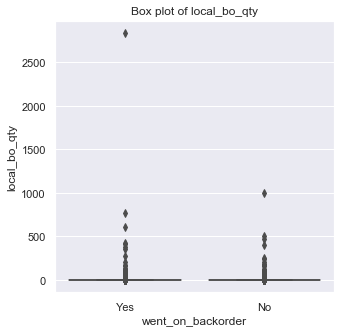

In [1021]:
sns.boxplot(x='went_on_backorder',y='local_bo_qty', data=data).set_title('Box plot of local_bo_qty')

In [1022]:
data[['local_bo_qty']].describe()

,local_bo_qty
count,9687.000000
mean,1.676370
std,35.270452
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2837.000000


In [1023]:
data.local_bo_qty.quantile(0.98)

5.0

In [1024]:
data.local_bo_qty.quantile(0.99)

20.0



*   Similar to other features this feature also has right skewedness  , but unlie other features the minority class ( went on back order = "Yes") also has a few values after IQR
*   Around 1% of datapoints only have non-zero value for this feature.


**Conclusions of boxplots :**

*   For Bi variate analysis the features local_bo_qty and pieces_past_due can be ignored as 98% values are zero
*   For the remaining features if we consider the datapoints between 0(0.001) th quantile and 90th quantiles values most of the outliers are removed and can make some inferences.
*   As plots of sales, forecast and performance features are same (very similar ) to the other columns in same features for bi variate analysis we can select one from each of the groups.
*   Right  skewed columns are skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

<h3> 3.2.7 Plotting pair plots between selected features for entrire data and data b/w 5th and 90th quantiles <h3>

In [1025]:
# Dropping last row as it contains NaN values
df.drop(data.tail(1).index,inplace=True) 

#Dropping first column
df.drop(['sku'], axis = 1,inplace=True) 

In [1026]:
df= data.copy()
cat = data.select_dtypes(include = ['object']).columns
num = data.select_dtypes(exclude = ['object']).columns
for col in num:
  if (((df[col].dtype)=='float64')):
    percentiles = df[col].quantile([0.05,0.9]).values
    df[col][df[col] < percentiles[0]] = percentiles[0]
    df[col][df[col] > percentiles[1]] = percentiles[1]          
   

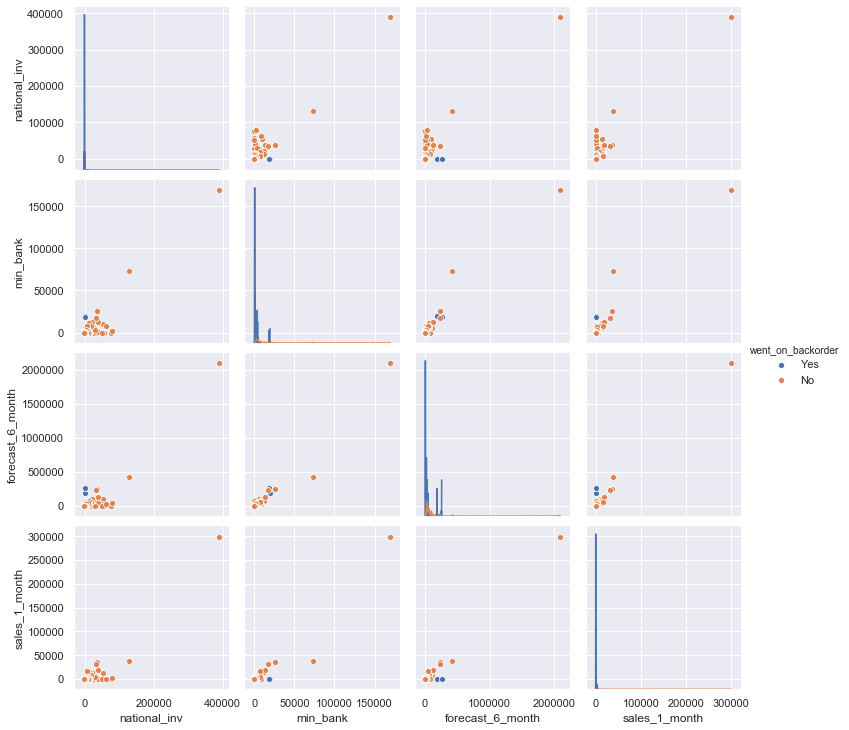

In [1027]:
sns.pairplot(df[['national_inv','min_bank','forecast_6_month','sales_1_month','went_on_backorder']],hue = 'went_on_backorder')



*   As data is highly imbalanced pairplots are not that clear.
*   For lower national_inv as min_bank increase there are higher chances of items going to backorder.
*   For low sales_1_month values and higher forecast_6_month it can be seen that more items went to backorder.
*   For higher nationa_inv>100 there are very less chances of items going into backorder.


<h3>3.2.7 Plotting Barplots for Categorical features  <h3>

Barplot for rev_stop



*   No item went to backorder if rev_stop flag is set to Yes
*   For rev_stop = 'No' the proportion of orders that did go to back order and that weren't is same as class ratio that is 99.33 % : 0.667%



Barplot for potential_issue



*   If potential_issue flag is 'Yes' then there is 9 times more chance of item going to back order when compared to if flag set to 'No'




Barplot for deck_risk



*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk



Barplot for oe_constraint



*   If oe_cosntraint flag is set to Yes then there is 5 times higher chance of item going to backorder when compared to flag set to No



Barplot for ppap_risk

*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

Barplot for stop_auto_buy

*   The flag stop_auto_buy is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

<h3> 3.2.8 Checking a few right skewed columns if they follow log-normal distribution by applyng log and comparing with Normal distribution using Q-Q plot <h3>

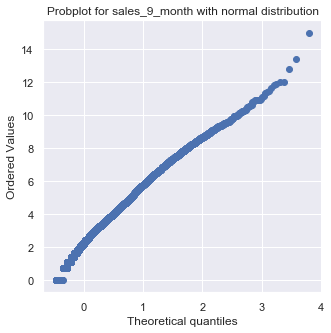

In [1028]:

fig = plt.figure()
ax = fig.add_subplot(111) 
sa = stats.probplot(np.log(data.sales_9_month.values),plot=ax)
ax.set_title("Probplot for sales_9_month with normal distribution")
plt.show()


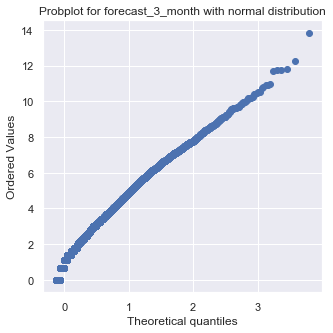

In [1029]:
fig = plt.figure()
ax = fig.add_subplot(111) 
sa = stats.probplot(np.log(data.forecast_3_month.values),plot=ax)
ax.set_title("Probplot for forecast_3_month with normal distribution")
plt.show()


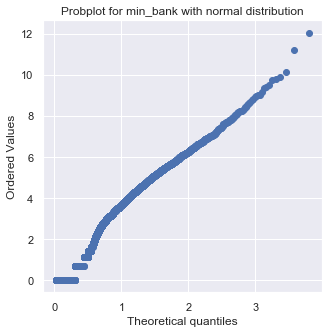

In [1030]:
fig = plt.figure()
ax = fig.add_subplot(111)
sa = stats.probplot(np.log(data.min_bank.values),plot=ax)
ax.set_title("Probplot for min_bank with normal distribution")
plt.show()


Checking distribution of data after appylying log

In [1031]:
dummy = data.sales_9_month.copy()

dummy = np.log(dummy)

In [1032]:
dummy.value_counts()

-inf         3079
 0.000000     404
 0.693147     293
 1.098612     231
 1.386294     195
             ... 
 8.622274       1
 7.302496       1
 9.141526       1
 7.576097       1
 6.406880       1
Name: sales_9_month, Length: 1501, dtype: int64

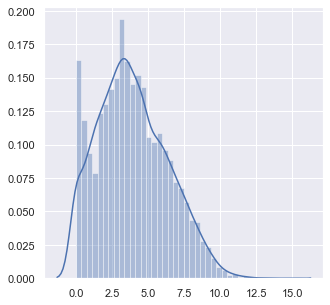

In [1033]:
sns.distplot(dummy.values[np.isfinite(dummy)])



*   For the 3 features selected when applied log-transform and plotted QQ plot it seems that they follow normal distributio as we got an approximate straight line when plotted QQ plot with normal distribution
*   The PDF plot of log(sales_9_month) seems like one side of the Normal distribution.
*   This type of right skewedness is expected as the sales of a few products would be very high => recommended stock in inventory should be high => forecast would be high 
*   Also as these skewed values affect modelling we can remove the extreme quantile values as they are mostly present in majority class



<h3>3.2.9 Plotting correlation matrix  <h3>

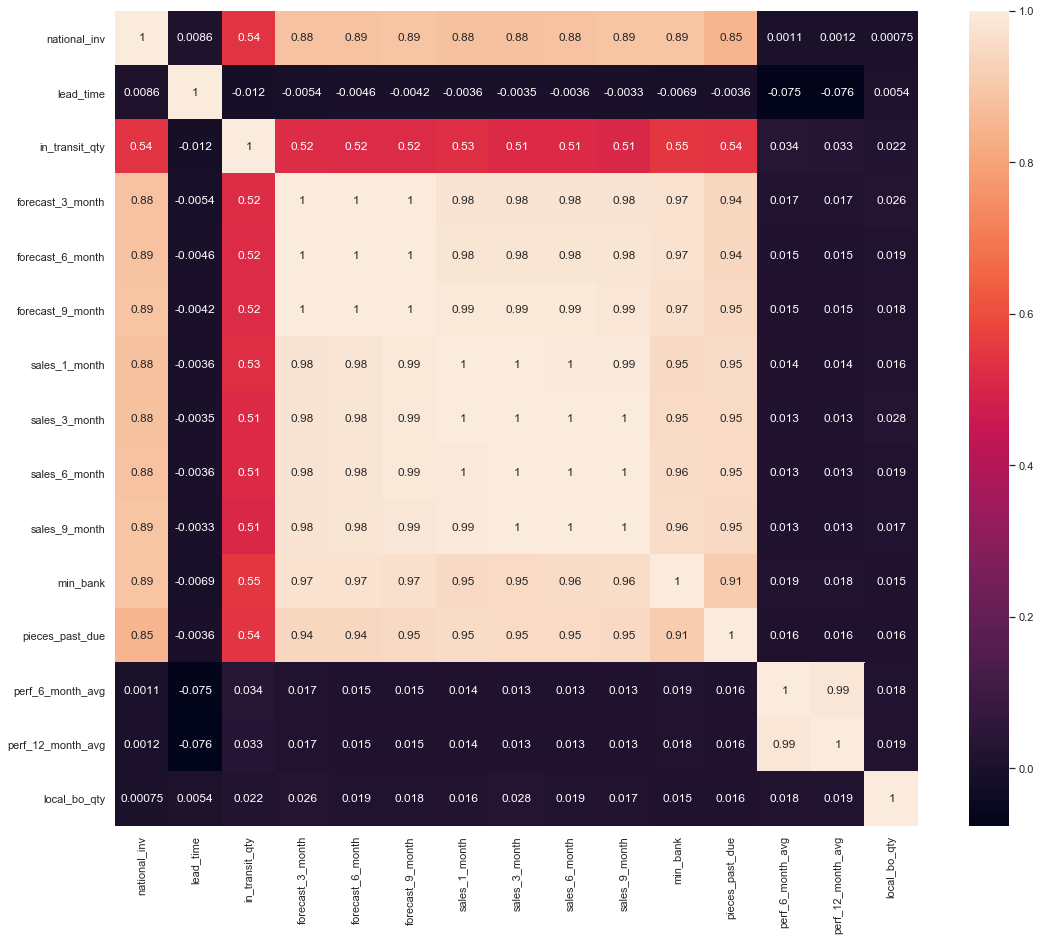

In [1034]:
cor = data.corr()
sns.set(rc={'figure.figsize':(18,15)})
# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot = True)

*   All the significant correlations observed are positive.
*   forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other to a degree of 0.99
*   sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other with a degree varying from 0.82 to 0.98
*   forecast and sale columns are correlated with each other with a minimum degree of 0.62 varying upto 0.88. It is obvious that when the sales for a certain products is high in the past sales the forecast for the same in the coming months will be higher and viceversa.
*   perf_6_month_avg and perf_12_month_avg are very highly correlated with each other to a degree of 0.97
*   min_bank ( minimum amount of stock recommended ) is highly correlated with sales and forecast columns as stock in inventory is directly proportional to sales.
*   in_transit_qty is highly correlated with sales, forecast and min_bank columns. This is obvious because high sales of a product => more of that product in transport for inventory replenishing
high sales of a product => high forecast 
*   pieces_past_due is meekly correlated with sales and forecast columns
*   national_inv is meekly correlated with min_bank and weekly correlated with sale columns.
*   As many features are correlated the linear models like logistic regression, Linear SVM and other linear models may not perform well as the coeffiecients of separating plane change
*   By checking VIF value between the correlated features we can remove redundant features if needed or using PCA we can reduce dimensions if feature importance of model is not important


Important conclusions from EDA:



1.   Dataset is highly imbalanced should be handled.
2.   Almost all numerical features have outliers and are in range <0th quantile valuue and >90th quantile value
3.  The sales , performance and forecast columns have distributions sames as others beloging to same group and are also highly correlated , so for appplying linear models only one from each group can be selected.( selecting all also won't deteroriate model performance)
4.  As seen from barplots except stop_auto_buy and deck_risk remaining categorical features are useful for classification.
5.  Missing values in lead_time and incorrect value(-99.0) in two performance feature columns should be handled.



In [955]:
'''threshold=0.99

# find and remove correlated features
def correlation(X, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr'''

In [1035]:
#correlation(data,threshold)

In [1036]:
#data.drop(correlation(df,threshold),axis=1,inplace=True)

In [1037]:
data.shape

(9687, 22)

In [1038]:
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [1039]:
data.drop(['rev_stop','oe_constraint','potential_issue'],axis=1,inplace=True)

In [1041]:
data.shape

(9687, 19)

<h3> 3.2.10 Preprocessing data <h3>

 Label encoding categorical variables

In [1042]:
cat = data.select_dtypes(include = ['object']).columns
for col in cat:
    data[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    data[col] = data[col].astype(int)

In [1043]:
#Lst of columns having right skewed data
skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']
#skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month', 'sales_1_month', 'min_bank','pieces_past_due','local_bo_qty']


<h1>4. Feature Engineering</h1>

<h2> 4.1 Train and test split <h2>

In [1044]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,ppap_risk,stop_auto_buy,went_on_backorder
0,0,NaN,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,0,0,1,1
1,6,NaN,0,0,0,0,0,0,0,0,2,0,-99.00,-99.00,0,0,0,1,1
2,0,2.0,0,4,7,7,0,0,0,0,0,0,0.70,0.73,0,0,0,1,1
3,7,8.0,0,11,27,47,2,2,2,2,0,0,0.70,0.73,0,0,0,1,1
4,0,8.0,0,9,14,16,0,0,0,0,1,0,0.95,0.94,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682,196,2.0,27,570,1074,1650,109,467,1020,1423,117,36,0.33,0.32,0,0,0,1,0
9683,0,2.0,0,55,55,55,0,0,0,0,1,15,0.00,0.00,0,1,1,1,0
9684,45,12.0,20,53,93,134,14,60,119,175,35,14,0.70,0.76,0,0,0,1,0
9685,130,8.0,45,70,160,240,53,122,208,315,101,10,0.84,0.86,1,0,0,1,0


In [1045]:
data_y = data['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(data.drop(['went_on_backorder'],axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

<h2> 4.2 Selecting the column indices which are right skewed to apply log transform <h2>

In [1046]:
log_columns = []
for i in skewed_right:
  log_columns.append(X_train.columns.get_loc(i))

<h2> 4.3 Imputing missing values using a model IterativeImputer <h2>

In [1047]:

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)
X_cv = imp.transform(X_cv)


In [1048]:
# Copying data to try and apply log transform 
X_train_log, X_cv_log,X_test_log, y_train_log, y_cv_log , y_test_log = X_train, X_cv,X_test, y_train, y_cv , y_test

<h2> 4.5 Applying Log transform for Right skewed columns <h2>

In [969]:
def log_transform(a):
  sign = np.sign(a[log_columns])

  a[log_columns] =  np.log(1.0+abs(a[log_columns]))*sign

  return a


In [1049]:
log_columns

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14]

In [1050]:
X_train_log = np.apply_along_axis(log_transform, 1, X_train_log)
X_cv_log = np.apply_along_axis(log_transform, 1, X_cv_log)
X_test_log = np.apply_along_axis(log_transform, 1, X_test_log)

<h2> 4.6 Applying standard scaler to log transformed data <h2>

In [1051]:
sc = StandardScaler().fit(X_train_log)
X_train_log = sc.transform(X_train_log)
X_cv_log = sc.transform(X_cv_log)
X_test_log = sc.transform(X_test_log)

#<h2> Key takeaways after EDA & Feature Engieering


1.   The problem we are solving is binary classification with very high data imbalance with positive class being the minority.
2.   Data consists of both Categorical features and numerical features.
3.   The categorical features consists of different flags with Yes or No values.
4.   Missing values are present in Lead time column and -99.0 an unusual value in performance columns in which the remaining values are b/w 0 and 1
5.   Almost all the numerical columns had extreme skewedness (on positive side) indicating them as outliers or also can be useful data as sale , inventory , forecast of some products might be very high which is also proved to be true when we plotted qq plot of normal distribution vs log(columns)
6.   As part of preprocesing and feature engineering data , dropped the first columns (Sku) which contains product ids unique for each row and also dropped the last row whch contains nan values.
7.   One hot encoded target variable and dependent variable with No as 0 and Yes as 1
8.   Replaced -99.0 in performance columns with Nan for imputation.
9.   Divided the data into tran test and CV sets.
10.  Fitted iterativeimputer on train data imputed nan values in train , test and CV sets.
11.  Fitted the Robust scaler on train data and tranformed train, test and cv sets. As Robusts scaler considers IQR for scaling the data the effect of right skewed values while scaling is mitigated.
12.  Applied the log transform to the data obtained in step 10 followed by standardization to prepare another dataset .



<h1> 6. Machine learning models <h1>

In [1052]:
def evaluate_model(model,X,y_true):
    """
    This function takes trained model , X(input) , y_true(true label) as input and 
    evaluates model on different metrics
    """
    th = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    pred = model.predict_proba(X)[:,1]
    scores = []
    tpr = []
    fpr = []

    for i in th:
        pred_labels =[]
        for j in pred:
            if j>=i:
                pred_labels.append(1)
            else:
                pred_labels.append(0)
        scores.append([recall_score(y_true,pred_labels,pos_label=1),precision_score(y_true,pred_labels,pos_label=1)])

        pred_labels = np.array(pred_labels)

        fp = np.sum((pred_labels == 1) & (y_true == 0))
        tp = np.sum((pred_labels == 1) & (y_true == 1))
        fn = np.sum((pred_labels == 0) & (y_true == 1))
        tn = np.sum((pred_labels == 0) & (y_true == 0))
    
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    f1score = f1_score(y_true, model.predict(X),average = None)
    print("The F1 scores of each class and Macro F1 score are : " , f1score[0] ,f1score[1] , (f1score[0]+f1score[1])/2)

    xx = [X[0] for X in scores]
    yy = [Y[1] for Y in scores]
    fig = plt.figure(figsize=(6,8))

    ax1 = fig.add_subplot(311)
    ax1.plot(xx,yy,label = 'AUC PR curve'+str(np.round(auc(xx,yy),3)))
    ax1.set_title("Precision - Recall curve")
    ax1.set_xlabel("Recall")
    ax1.set_ylabel("Precision")
    ax1.legend()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)
    ax2 = fig.add_subplot(312)
    ax2.plot(fpr,tpr,label = "Model ROC AUC on test data : "+str(np.round(auc(fpr,tpr),3)))
    ax2.plot([0, 1], ls="--",label='No Skill')
    ax2.set_title("ROC-AUC curve")
    ax2.set_xlabel("FPR")
    ax2.set_ylabel("TPR")
    ax2.legend()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)


<h2> 6.2 On Log tranformed + Normalized dataset <h2>

<h3> 6.2.2 Random Forest Classifier<h3>

In [1069]:
model1 = RandomForestClassifier(n_jobs = -1)
parameters = {'n_estimators' : [1000,1200,1400] , 'max_depth' : [9,11,13]}
clf = GridSearchCV(model1, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'max_depth': 11, 'n_estimators': 1400}
Best Score :  0.9429923992024655


In [1070]:
model1 = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],max_depth =gs.best_params_['max_depth'], n_jobs=-1)
model1.fit(X_train_log, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [1071]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model1.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model1.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model1.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.8521179401993356
The Macro F1-Score obtained on CV set is :  0.8577198457866716
The F1 scores of each class on CV set are :  [0.92307692 0.79236277]


The F1 scores of each class and Macro F1 score are :  0.9291562833748664 0.8134957825679474 0.871326032971407


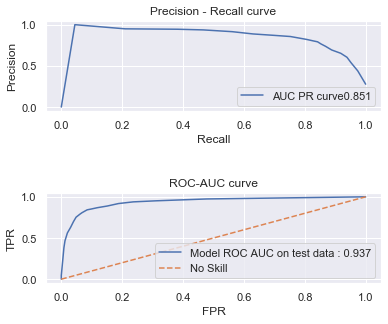

In [1072]:
evaluate_model(model1,X_test_log,y_test)

In [491]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

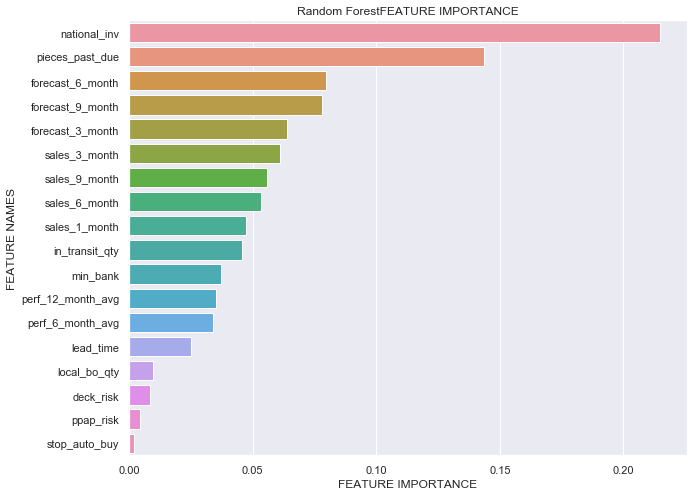

In [1074]:
plot_feature_importance(model1.feature_importances_,data.columns,'Random Forest')

<h3> 6.2.3 XGBoost <h3>

In [1053]:
model2 = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [55,60,65],'learning_rate': [0.05,0.1,0.3]}
clf = GridSearchCV(model2, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

[20:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [1054]:
model2 = XGBClassifier(n_estimators = gs.best_params_['n_estimators'],nthread=-1)
model2.fit(X_train_log, y_train)

[20:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=8, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [1055]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model2.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model2.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model2.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.8562292358803987
The Macro F1-Score obtained on CV set is :  0.8624190576022452
The F1 scores of each class on CV set are :  [0.92579505 0.79904306]


The F1 scores of each class and Macro F1 score are :  0.9297181591152337 0.8164026095060577 0.8730603843106457


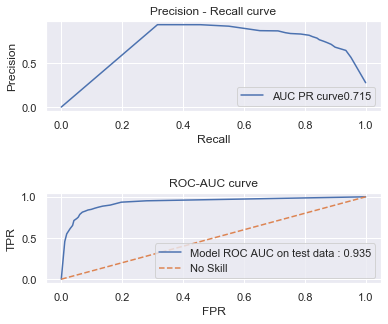

In [1056]:
evaluate_model(model2,X_test_log,y_test)

In [1080]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,ppap_risk,stop_auto_buy
0,0,NaN,0,0,0,0,0,0,0,0,0,0,-99.00,-99.00,0,0,0,1
1,6,NaN,0,0,0,0,0,0,0,0,2,0,-99.00,-99.00,0,0,0,1
2,0,2.0,0,4,7,7,0,0,0,0,0,0,0.70,0.73,0,0,0,1
3,7,8.0,0,11,27,47,2,2,2,2,0,0,0.70,0.73,0,0,0,1
4,0,8.0,0,9,14,16,0,0,0,0,1,0,0.95,0.94,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9682,196,2.0,27,570,1074,1650,109,467,1020,1423,117,36,0.33,0.32,0,0,0,1
9683,0,2.0,0,55,55,55,0,0,0,0,1,15,0.00,0.00,0,1,1,1
9684,45,12.0,20,53,93,134,14,60,119,175,35,14,0.70,0.76,0,0,0,1
9685,130,8.0,45,70,160,240,53,122,208,315,101,10,0.84,0.86,1,0,0,1


In [1067]:
data.drop(['went_on_backorder'],axis=1,inplace=True)

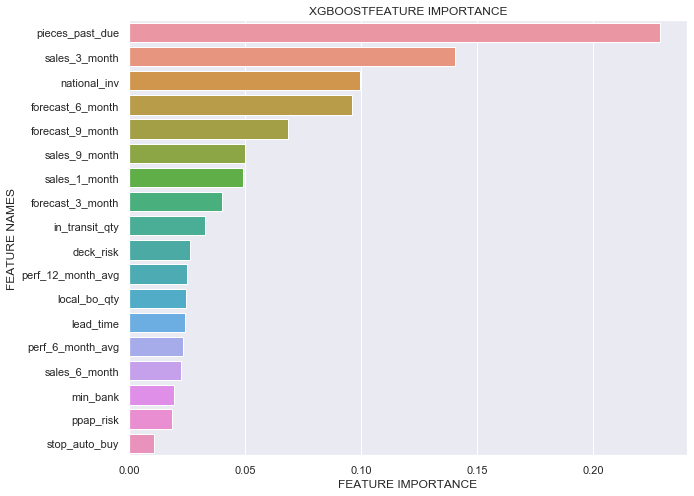

In [1068]:
plot_feature_importance(model2.feature_importances_,data.columns,'XGBOOST')

In [1079]:
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'deck_risk', 'ppap_risk', 'stop_auto_buy'],
      dtype='object')

In [1105]:
model2.predict(X_test)[1936]


1

In [1106]:
X_test[1936]

array([-0.69314718,  8.        ,  0.        ,  3.71357207,  3.93182563,
        4.26267988,  1.38629436,  3.04452244,  3.95124372,  4.20469262,
        1.38629436,  0.        ,  0.18      ,  0.33      ,  0.69314718,
        0.        ,  0.        ,  1.        ])

In [1077]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("model2.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

<h1> 7. Comparision of performance of different models <h1>



*   The best model is XGBOOST  with test ROC-AUC score of 0.97 and Area under precision-Recall curve of 0.366(ROC-AUC 0.926 and Pr-Re AUC 0.272 on test file in dataset)g
*   Area under precision recall curve is an important metric as the Managerial decision for threshold selection is based on precision and recall values.
*   The F1-Scores obtained above are with threshold of 0.5 which is default in sklearn

